In [1]:
tree = {"name": "Покупать",
        "type": "decision",
        "child_edges":[
                       {"name": "Да",
                        "payoff": -1000,
                        "child_node": 
                                    {"name": "Геология",
                                     "type": "chance",
                                     "child_edges": [
                                                    {"name": "Плохая",
                                                     "payoff": 1000,
                                                     "probability": 0.3,
                                                     "child_node": {"type": "terminal"}
                                                    },
                                                    {"name": "Хорошая",
                                                     "payoff": 1100,
                                                     "probability": 0.4,
                                                     "child_node": {"type": "terminal"}
                                                    },
                                                    {"name": "Отличная",
                                                     "payoff": 1200,
                                                     "probability": 0.3,
                                                     "child_node": {"type": "terminal"}
                                                    },
                                                    ]  
                                    }
                        },
                        {"name": "Нет",
                         "payoff": 0,
                         "child_node": {"name": "Геология",
                                     "type": "chance",
                                     "child_edges": [
                                                    {"name": "Плохая",
                                                     "payoff": 1000,
                                                     "probability": 0.3,
                                                     "child_node": {"type": "terminal"}
                                                    },
                                                    {"name": "Хорошая",
                                                     "payoff": 1100,
                                                     "probability": 0.4,
                                                     "child_node": {"type": "terminal"}
                                                    },
                                                    {"name": "Отличная",
                                                     "payoff": 1200,
                                                     "probability": 0.3,
                                                     "child_node": {"type": "terminal"}
                                                    },
                                                    ]  
                                    }
                        }
                    ]  
        }

In [2]:
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Polygon, Rectangle, FancyArrowPatch, FancyArrow, ArrowStyle, RegularPolygon

In [28]:
def plot_tree(tree, ax):
    def patch_terminal(x, y):
        p = RegularPolygon((x, y), 3, radius=0.3, orientation=3.14/2, ec="b", fc='g')
        return p
    
    def patch_decision(x, y):
        p = Rectangle((x-0.2, y-0.2), 0.4, 0.4, ec="b", fc='r')
        return p   
        
    def patch_chance(x, y):
        p = Circle((x, y), 0.2, ec="b", fc='y')
        return p


    def num_tree(tree, ax, lev=0, num=0, mnum={}):
        tree['level'] = lev
        tree['x'] = lev
        tree['num'] = num

        if lev in mnum:
            num = mnum[lev]
        else:    
            num = 0 
        if 'child_edges' in tree:
            avnum = []
            for edge in tree['child_edges']:
                num = num_tree(edge['child_node'], ax, lev+2, num+1, mnum)
                avnum.append(edge['child_node']['y'])
                #num = num + 1

            tree['y'] = sum(avnum) / len(avnum) if len(avnum) > 0 else 1
        else:
            tree['y'] = num
        
        if lev in mnum:
            mnum[lev] = mnum[lev] + 1
        else:
            mnum[lev] = 1
        
        if tree['type'] == 'decision':
            p = patch_decision(tree['x'], tree['y'])
        if tree['type'] == 'chance':
            p = patch_chance(tree['x'], tree['y'])
        if tree['type'] == 'terminal':
            p = patch_terminal(tree['x'], tree['y'])
        ax.add_artist(p)
        tree['patch'] = p
        if 'child_edges' in tree:

            for edge in tree['child_edges']:

                
                a = FancyArrowPatch((tree['x'], tree['y']), (edge['child_node']['x'], edge['child_node']['y']), 
                    #arrowstyle="Simple, tail_width=4, head_width=12, head_length=13",
                    #arrowstyle="CurveB, head_length=0.4, head_width=0.2, widthA=1.0, widthB=1.0, lengthA=0.2, lengthB=0.2, angleA=0, angleB=0, scaleA=None, scaleB=None",
                    arrowstyle="->, head_length=4, head_width=3",
                    connectionstyle = "arc,angleA=0,angleB=180,armA=50,armB=50,rad=10",
                    patchA = tree['patch'],
                    patchB = edge['child_node']['patch']
                    )


                ax.add_artist(a)
        return num
    
    mn = {}

    num_tree(tree , ax, mnum=mn)

    print(mn)
    ax.set_xlim(-1, max(mn)+1)
    ax.set_ylim(-1, max(mn.values())+1)
    ax.axis('off')

    

{4: 6, 2: 2, 0: 1}


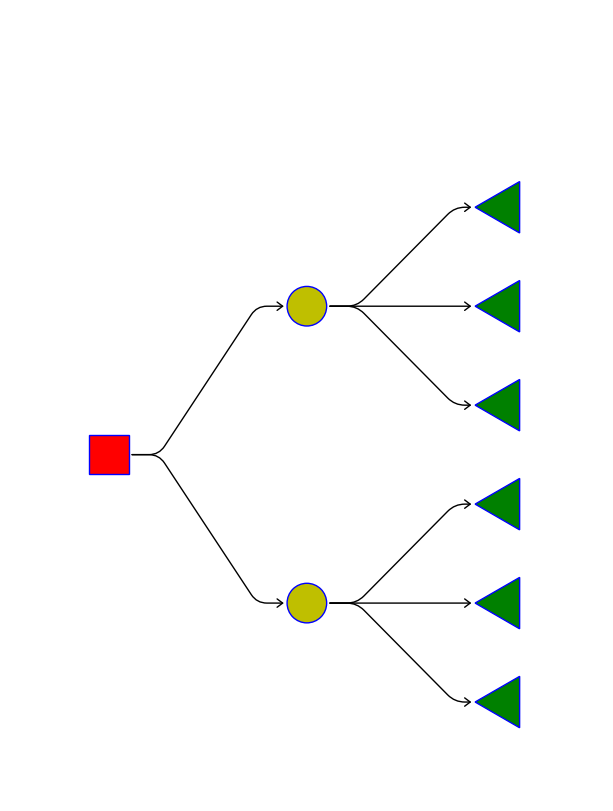

In [29]:
fig, ax = plt.subplots(figsize=(10, 8), layout='constrained')


plot_tree(tree, ax)
ax.set_aspect('equal')
plt.show()


In [20]:
a={4: 6, 2: 2, 0: 1}

In [23]:
max(a.values())

6

In [31]:
m = tree3 = {"name": "ГДИС",
        "type": "decision",
        "child_edges":[
                       {"name": "Да",
                        "voi_info":"with_info",
                        "payoff": -1,
                        "child_node": 
                                    {"name": "Скин",
                                     "type": "chance",
                                     "child_edges": [
                                                    {"name": "S=14",
                                                     "payoff": 0,
                                                     "probability": 0.5,
                                                     "child_node": 
                                                                {"name": "ОПЗ",
                                                                 "type": "decision",
                                                                 "child_edges":[
                                                                                   {"name": "Да",
                                                                                    "voi_info":"with_info",
                                                                                    "payoff": 72,
                                                                                    "child_node": {"type": "terminal"}                                                                                               
                                                                                    },
                                                                                    {"name": "Нет",
                                                                                     "voi_info":"without_info",
                                                                                     "payoff": 0,
                                                                                     "child_node": {"type": "terminal"}
                                                                                    }
                                                                                ]  
                                                                }
                                                    },
                                                    {"name": "S=7",
                                                     "payoff": 0,
                                                     "probability": 0.2,
                                                     "child_node": 
                                                                {"name": "ОПЗ",
                                                                 "type": "decision",
                                                                 "child_edges":[
                                                                                   {"name": "Да",
                                                                                    "voi_info":"with_info",
                                                                                    "payoff": 47,
                                                                                    "child_node": {"type": "terminal"}                                                                                               
                                                                                    },
                                                                                    {"name": "Нет",
                                                                                     "voi_info":"without_info",
                                                                                     "payoff": 0,
                                                                                     "child_node": {"type": "terminal"}
                                                                                    }
                                                                                ]  
                                                                }
                                                    },
                                                    {"name": "S=0",
                                                     "payoff": 0,
                                                     "probability": 0.3,
                                                     "child_node": 
                                                                {"name": "ОПЗ",
                                                                 "type": "decision",
                                                                 "child_edges":[
                                                                                   {"name": "Да",
                                                                                    "voi_info":"with_info",
                                                                                    "payoff": -1,
                                                                                    "child_node": {"type": "terminal"}                                                                                               
                                                                                    },
                                                                                    {"name": "Нет",
                                                                                     "voi_info":"without_info",
                                                                                     "payoff": 0,
                                                                                     "child_node": {"type": "terminal"}
                                                                                    }
                                                                                ]  
                                                                }
                                                    },
                                                    ]  
                                    }
                        },
                        {"name": "Нет",
                         "voi_info":"without_info",
                         "payoff": 0,
                         "child_node": 
                             {"name": "ОПЗ",
                             "type": "decision",
                             "child_edges":[
                                               {"name": "Да",
                                                "voi_info":"with_info",
                                                "payoff": -1,
                                                "child_node": 
                                                    {"name": "Скин",
                                                         "type": "chance",
                                                         "child_edges": [
                                                                        {"name": "S=14",
                                                                         "payoff": 73,
                                                                         "probability": 0.5,
                                                                         "child_node": {"type": "terminal"}  
                                                                                    
                                                                        },
                                                                        {"name": "S=7",
                                                                         "payoff": 48,
                                                                         "probability": 0.2,
                                                                         "child_node": {"type": "terminal"}  
                                                                                   
                                                                        },
                                                                        {"name": "S=0",
                                                                         "payoff": 0,
                                                                         "probability": 0.3,
                                                                         "child_node": {"type": "terminal"}  
                                                                                   
                                                                        },
                                                                        ]  
                                                        }                                                                                       
                                                },
                                                {"name": "Нет",
                                                 "voi_info":"without_info",
                                                 "payoff": 0,
                                                 "child_node": {"type": "terminal"}
                                                }
                                            ]  
                            }
                        }
                    ]  
        }

{6: 9, 4: 5, 2: 2, 0: 1}


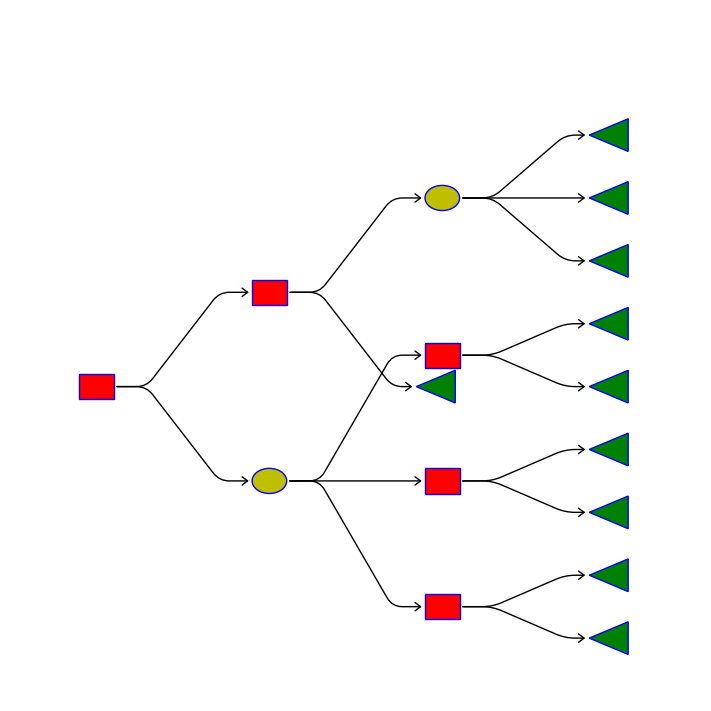

In [32]:
fig, ax = plt.subplots(figsize=(7, 7), layout='constrained')
ax.set_xlim(-1, 7)
ax.set_ylim(-1, 17)
ax.axis('off')

plot_tree(tree3, ax)

plt.show()

ValueError: 'path' is not a valid quadratic Bezier curve

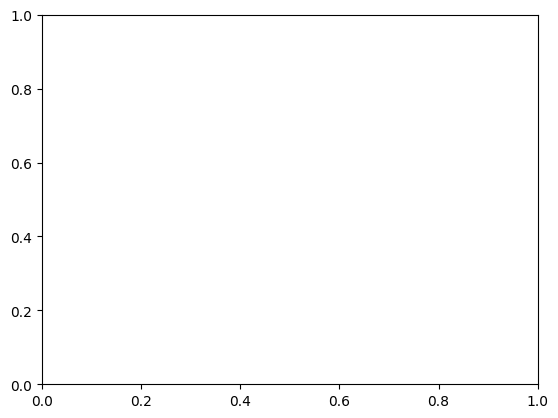

In [144]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

start_point = np.array([0, 0])
control_point = np.array([1, 1])
end_point = np.array([2, 0])

# Create a quadratic Bezier curve path
path = patches.FancyArrowPatch(
    posA=start_point,
    posB=end_point,
    connectionstyle="arc,angleA=0,angleB=0,armA=0.1,armB=0.10,rad=0",
    arrowstyle="Simple,tail_width=0.2,head_width=0.4,head_length=0.4"
)

# Create a new figure and axis
fig, ax = plt.subplots()

# Add the path to the axis
ax.add_patch(path)

# Set the limits of the axis to match the size of the path
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 2)

# Show the plot
plt.show()

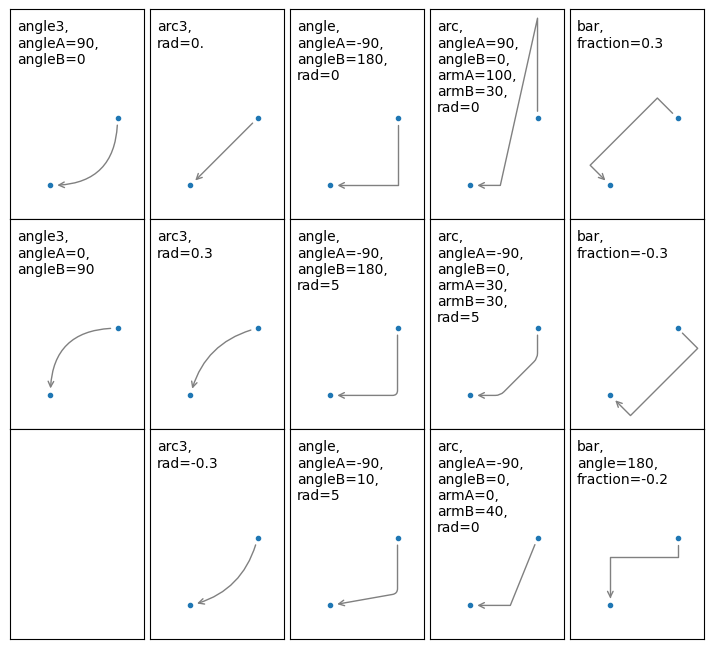

In [147]:
import matplotlib.pyplot as plt


def demo_con_style(ax, connectionstyle):
    x1, y1 = 0.3, 0.2
    x2, y2 = 0.8, 0.6

    ax.plot([x1, x2], [y1, y2], ".")
    ax.annotate("",
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle=connectionstyle,
                                ),
                )

    ax.text(.05, .95, connectionstyle.replace(",", ",\n"),
            transform=ax.transAxes, ha="left", va="top")


fig, axs = plt.subplots(3, 5, figsize=(7, 6.3), layout="constrained")
demo_con_style(axs[0, 0], "angle3,angleA=90,angleB=0")
demo_con_style(axs[1, 0], "angle3,angleA=0,angleB=90")
demo_con_style(axs[0, 1], "arc3,rad=0.")
demo_con_style(axs[1, 1], "arc3,rad=0.3")
demo_con_style(axs[2, 1], "arc3,rad=-0.3")
demo_con_style(axs[0, 2], "angle,angleA=-90,angleB=180,rad=0")
demo_con_style(axs[1, 2], "angle,angleA=-90,angleB=180,rad=5")
demo_con_style(axs[2, 2], "angle,angleA=-90,angleB=10,rad=5")
demo_con_style(axs[0, 3], "arc,angleA=90,angleB=0,armA=100,armB=30,rad=0")
demo_con_style(axs[1, 3], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5")
demo_con_style(axs[2, 3], "arc,angleA=-90,angleB=0,armA=0,armB=40,rad=0")
demo_con_style(axs[0, 4], "bar,fraction=0.3")
demo_con_style(axs[1, 4], "bar,fraction=-0.3")
demo_con_style(axs[2, 4], "bar,angle=180,fraction=-0.2")

for ax in axs.flat:
    ax.set(xlim=(0, 1), ylim=(0, 1.25), xticks=[], yticks=[], aspect=1.25)
fig.get_layout_engine().set(wspace=0, hspace=0, w_pad=0, h_pad=0)

plt.show()